In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

In [2]:
crop_data=pd.read_csv('Crop_recommendation.csv')
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
crop_data.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [6]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

<Axes: xlabel='K', ylabel='Count'>

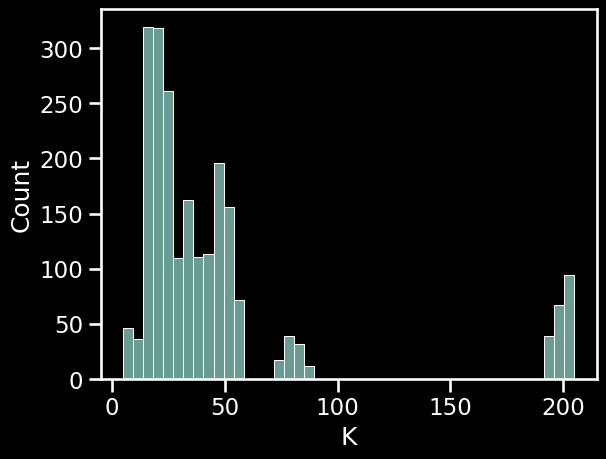

In [8]:
sns.histplot(crop_data.K)

<Axes: xlabel='N', ylabel='Count'>

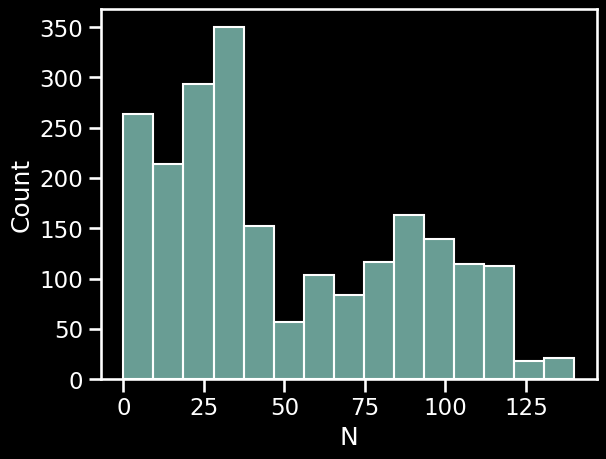

In [9]:
sns.histplot(crop_data.N)

<Axes: xlabel='P', ylabel='Count'>

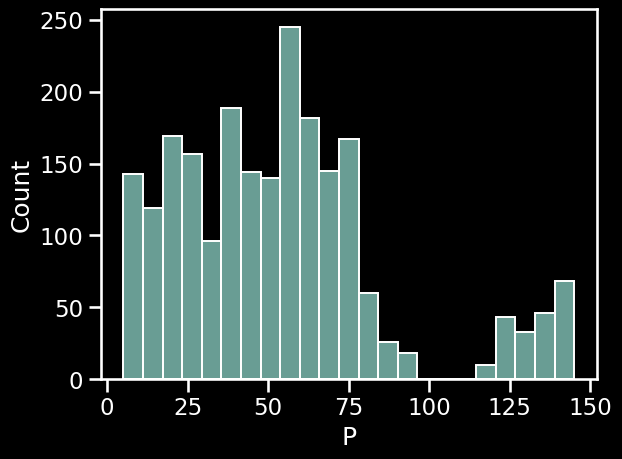

In [10]:
sns.histplot(crop_data.P)

<Axes: xlabel='temperature', ylabel='Count'>

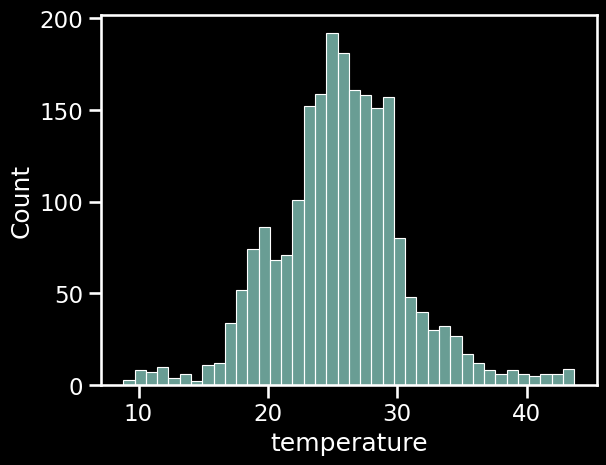

In [11]:
sns.histplot(crop_data.temperature)

<Axes: xlabel='humidity', ylabel='Count'>

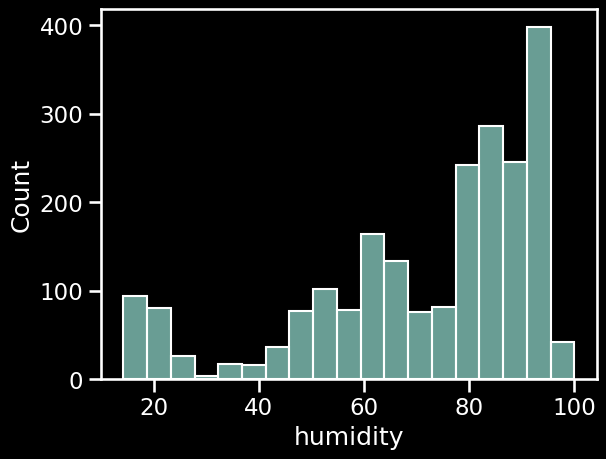

In [12]:
sns.histplot(crop_data.humidity)

<Axes: xlabel='rainfall', ylabel='Count'>

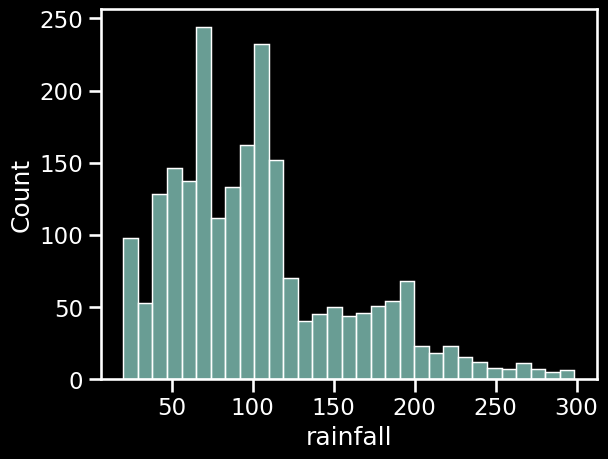

In [13]:
sns.histplot(crop_data.rainfall)

<Axes: xlabel='ph', ylabel='Count'>

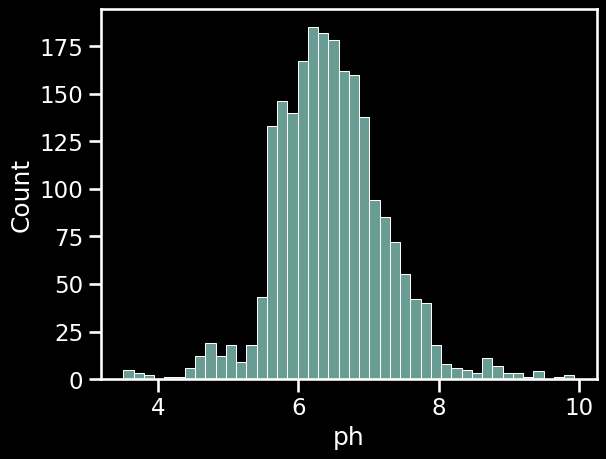

In [14]:
sns.histplot(crop_data.ph)

In [15]:
def make_violinplot(feature):
    sns.violinplot(crop_data[feature])
    plt.ylabel(feature)

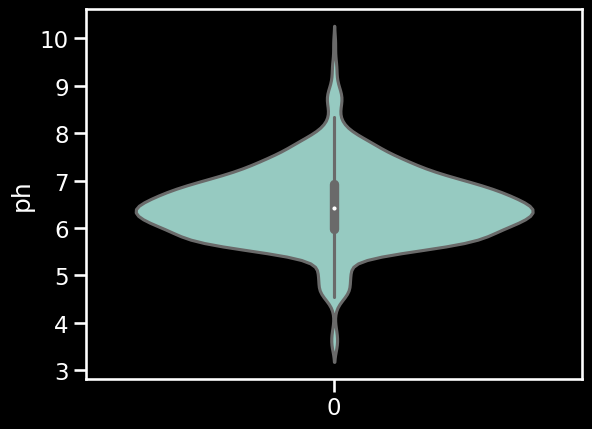

In [16]:
make_violinplot('ph')

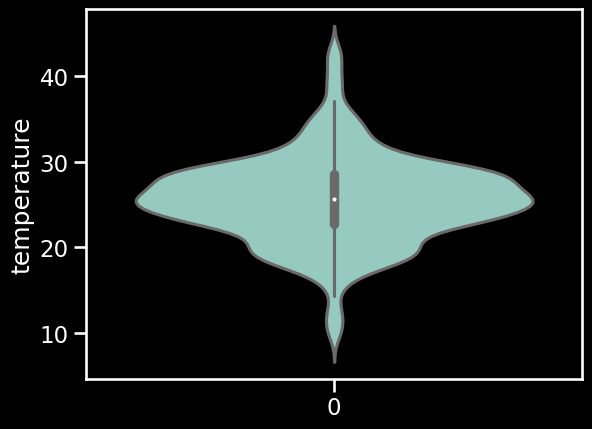

In [17]:
make_violinplot('temperature')

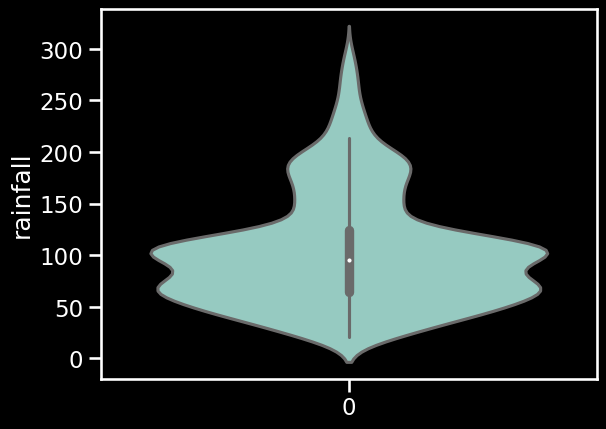

In [18]:
make_violinplot('rainfall')

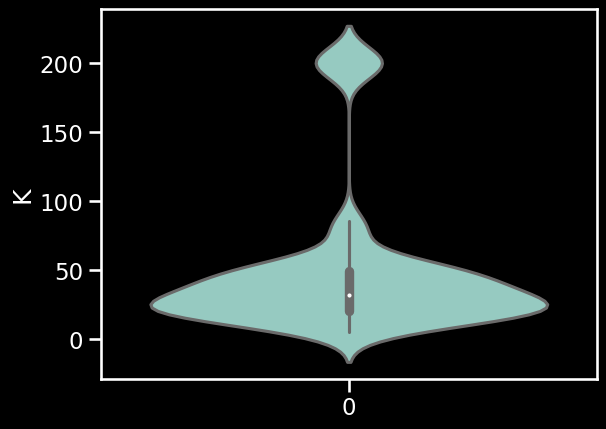

In [19]:
make_violinplot('K')

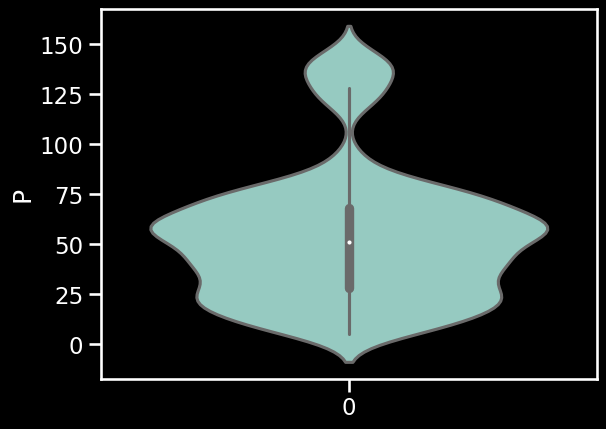

In [20]:
make_violinplot('P')

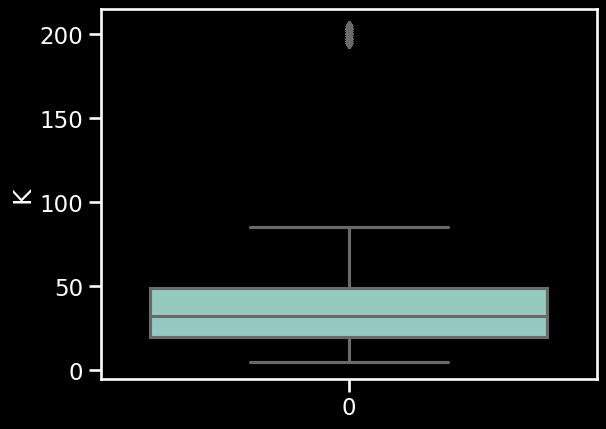

In [21]:
def make_boxplot(feature):
    sns.boxplot(crop_data[feature])
    plt.ylabel(feature)

make_boxplot('K')

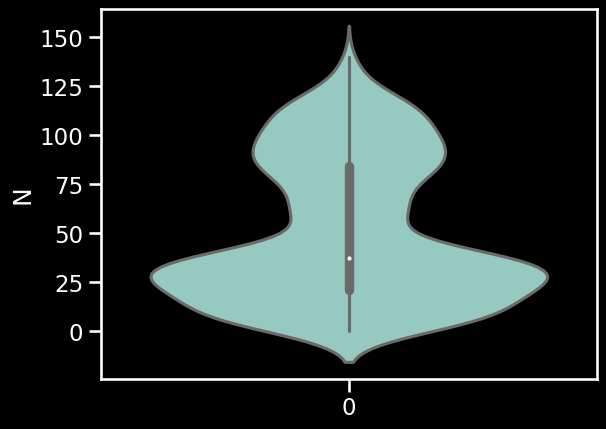

In [22]:
make_violinplot('N')

Distributions are different for both the climate and soil variables - 
- The soil features have a distribution in which values decrease towards the middle and are more concentrated around the edges.
- ph and temperature are approximately normal, with ph having some values seeming to be outliers(I'll assume them to be correct measurements for now).
- humidity and rainfall both have skewed distributions 

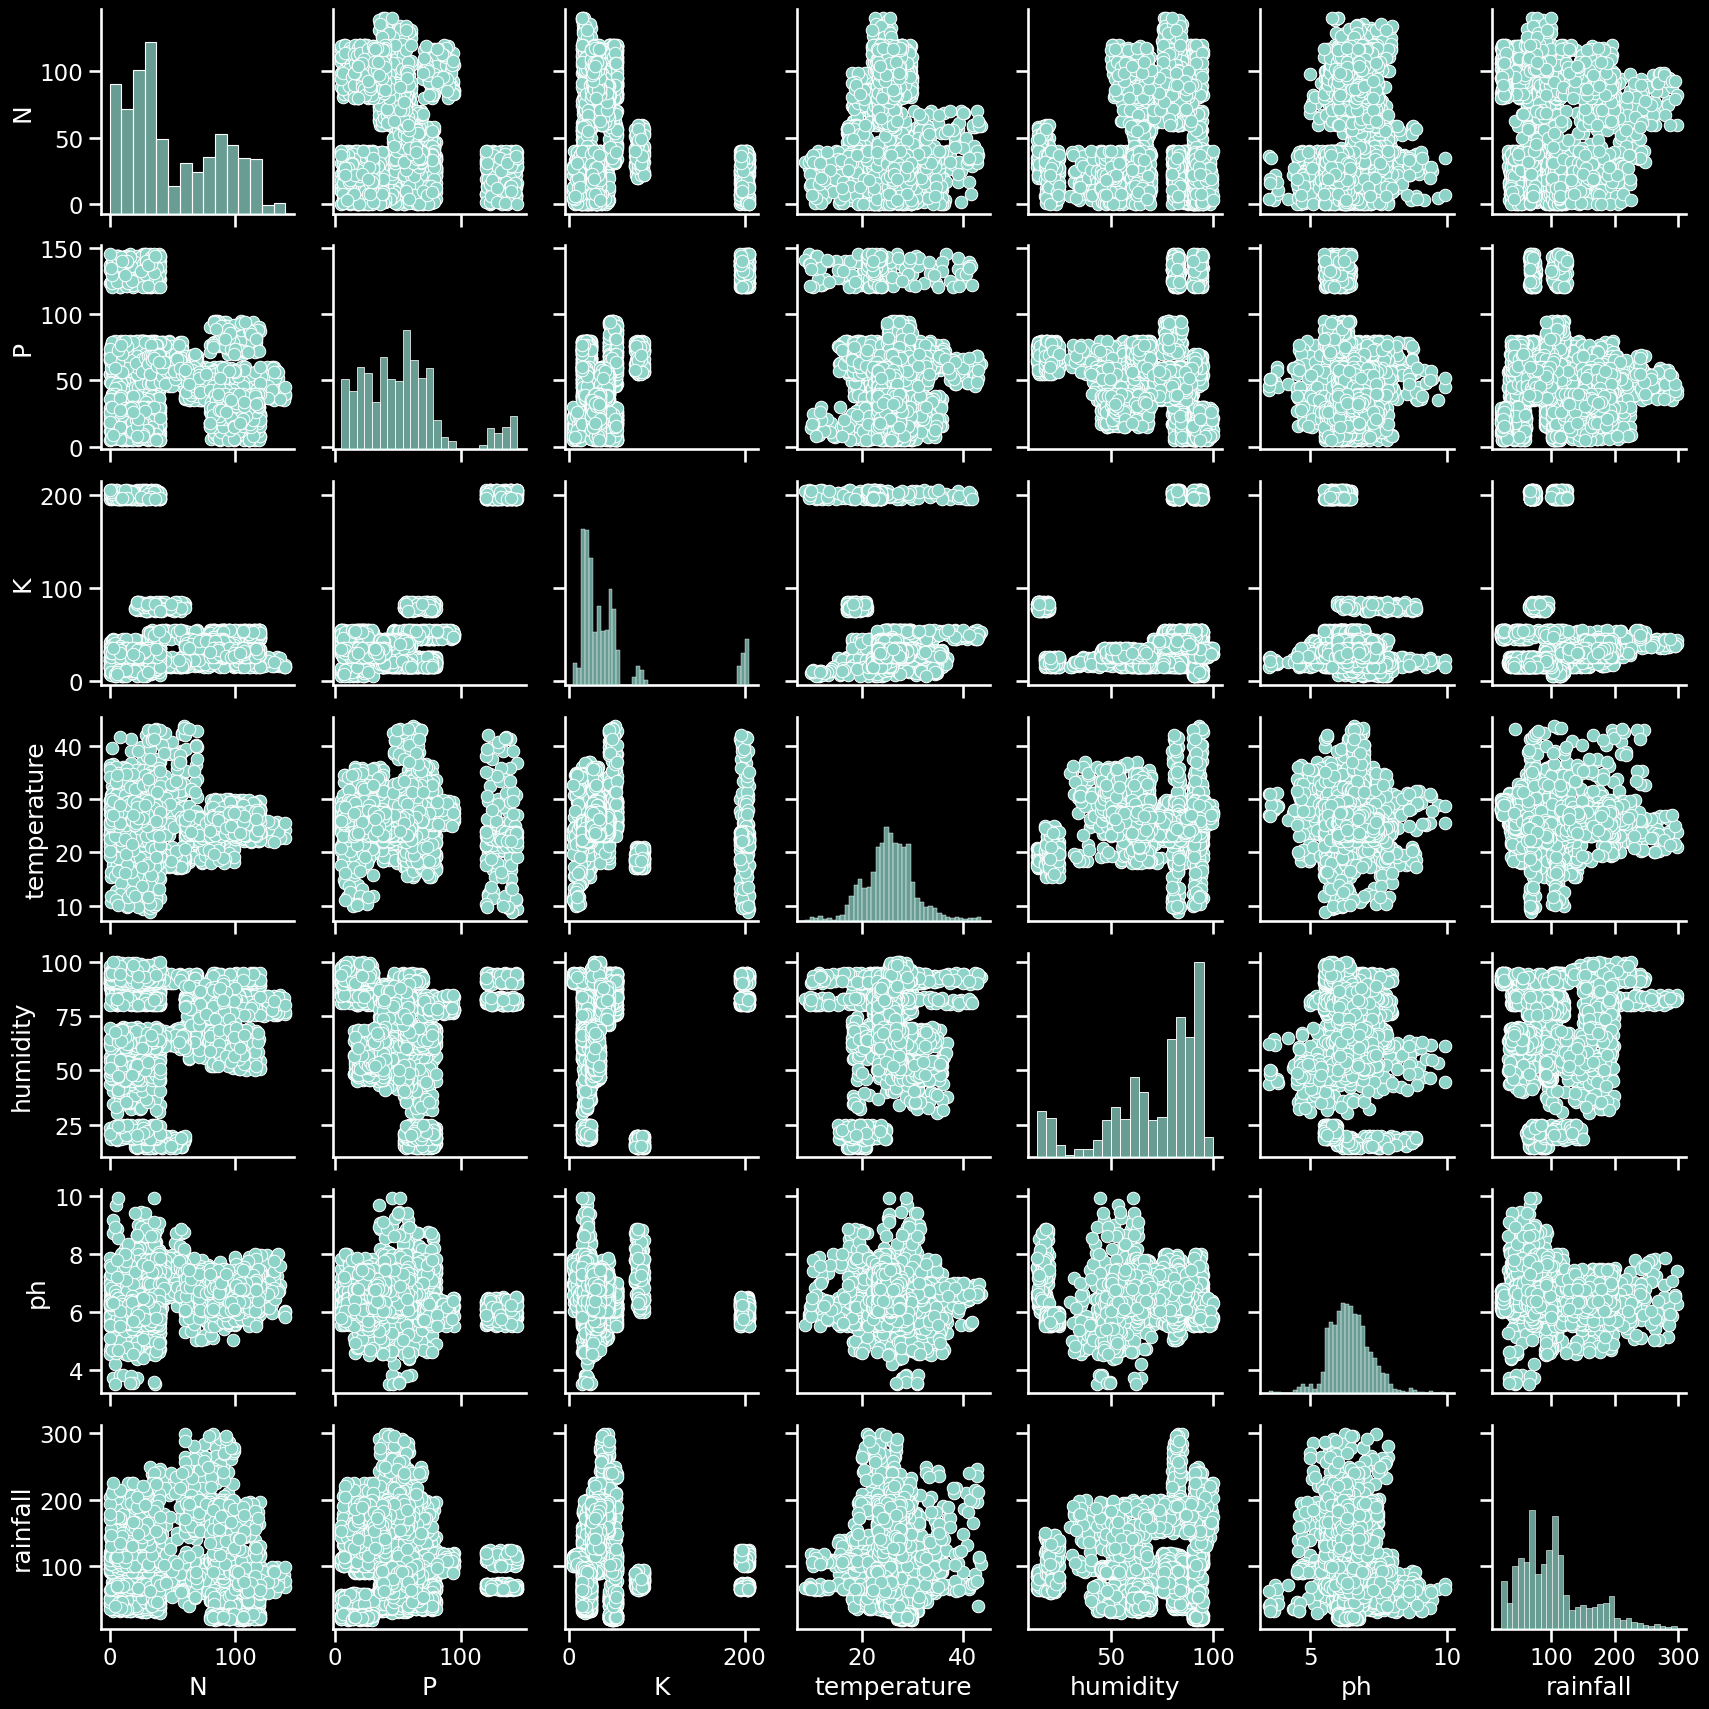

In [23]:
sns.pairplot(crop_data)

The pairplot reveals some interesting insights into the dataset. Some feature pairs such as temperature and ph are completely unrelated to one another, while K has constrained distribution which seems to be somewhat unnatural. Features may have been engineered to be this way.  

In [24]:
numerical_cols=list(crop_data.columns)
numerical_cols.remove('label')
numerical_cols

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

<Axes: >

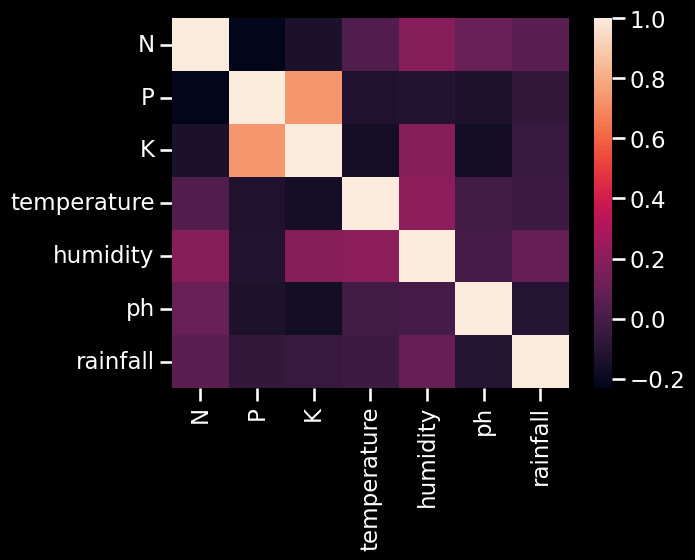

In [25]:
sns.heatmap(crop_data[numerical_cols].corr(),annot=False)

Phosphorus and Potassium values are highly correlated in this dataset, also, other features do not seem to be particularly correlated. Correlation with the labels will need to be measured separately.

Additionally, the distribution of variables and their correlation should also be checked for each particular label, which might lead to some interesting (and surprising) results.

Text(0.5, 0, 'Labels')

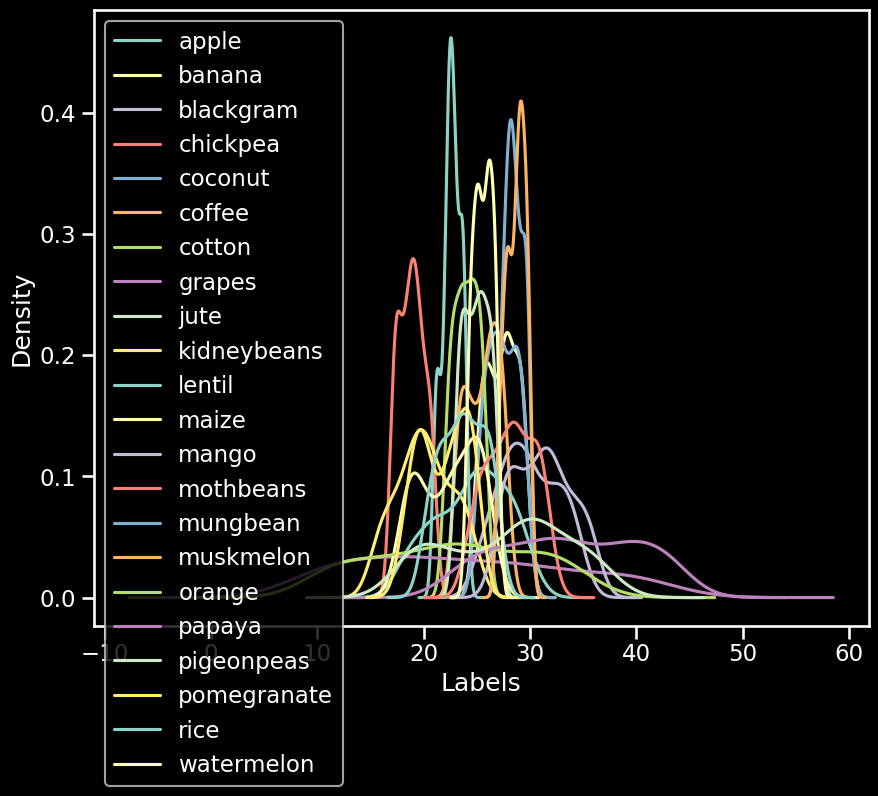

In [26]:
plt.figure(figsize=(10,8))
crop_data.groupby(by='label')['temperature'].plot(kind='kde')
plt.legend()
plt.xlabel('Labels')

Text(0.5, 0, 'Labels')

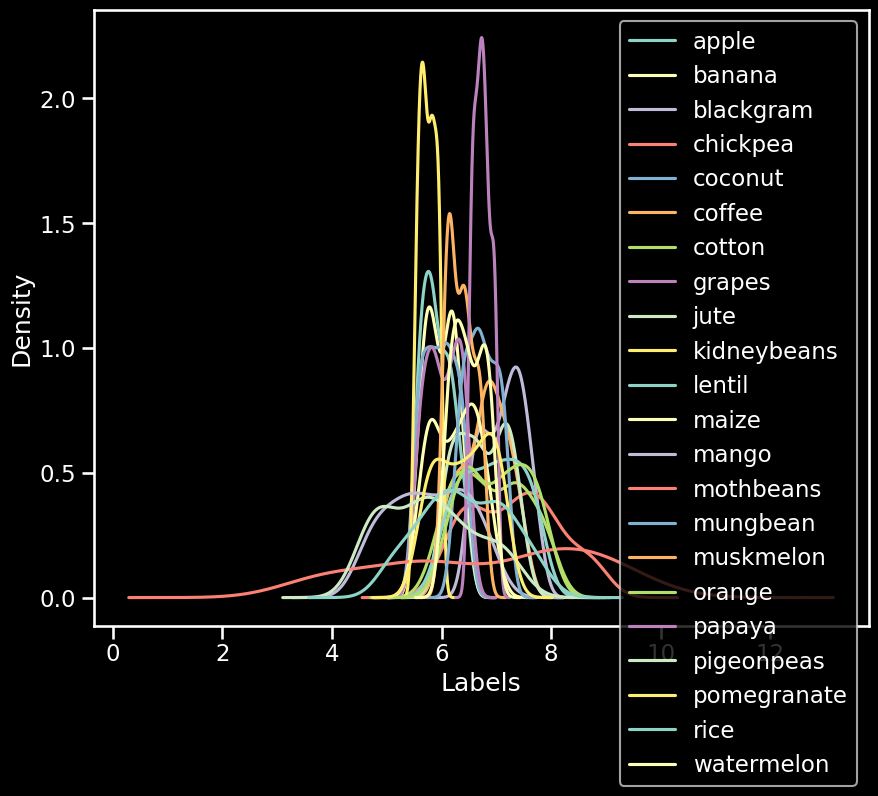

In [27]:
plt.figure(figsize=(10,8))
crop_data.groupby(by='label')['ph'].plot(kind='kde')
plt.legend()
plt.xlabel('Labels')

These plots are getting too confusing, so separation is necessary. The criteria for doing this is the cultivated amount for the crop, the most popular crops will be picked to give clarity regarding the most cultivated crops. <br>

There is also the issue of outliers, which I cannot accept or reject due to lack of subject matter expertise. For example, in this plot itself most ph values are lying between 5 and 8, but some values stretch beyond that, mostly mothbeans which are shown to be grown in a ph of 0 and 14, which is just not possible. Such values will be treated as incorrect observations and removed to ensure the model does not pick up noise because of bad data.

### Selecting crops for further analysis

Crops selected are : 
1. Rice
2. Cotton
3. Mung beans
4. Jute
5. Mango
6. Chickpea

The given data does not contain observations on wheat, sugarcane, groundnut and tea which are some major crops grown in India. 

In [28]:
crop_data_selective=crop_data[crop_data['label'].isin(['rice','cotton','mungbean','jute','mango','chickpea'])]
crop_data_selective['label'].unique()

array(['rice', 'chickpea', 'mungbean', 'mango', 'cotton', 'jute'],
      dtype=object)

In [29]:
def plot_distribution_by_label(feature):
    grouped_selective_data=crop_data_selective.groupby(by='label')
    grouped_selective_data[feature].plot(kind='kde')
    plt.xlabel('Label')
    plt.ylabel(feature[0].upper()+feature[1:])
    plt.legend()

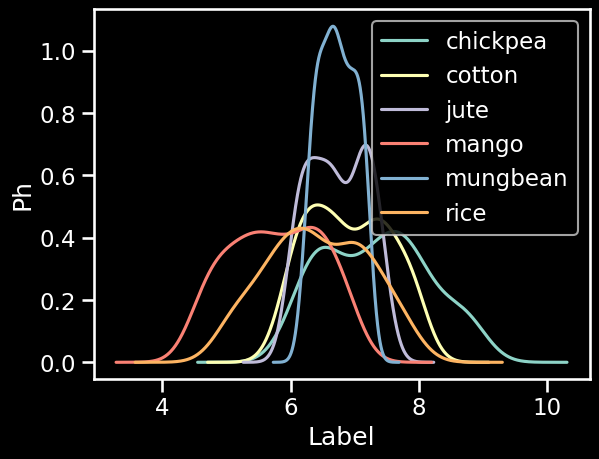

In [30]:
plot_distribution_by_label('ph')

In [31]:
np.count_nonzero(crop_data_selective['ph']<=4.5)

0

In [32]:
np.count_nonzero(crop_data_selective['ph']>=10)

0

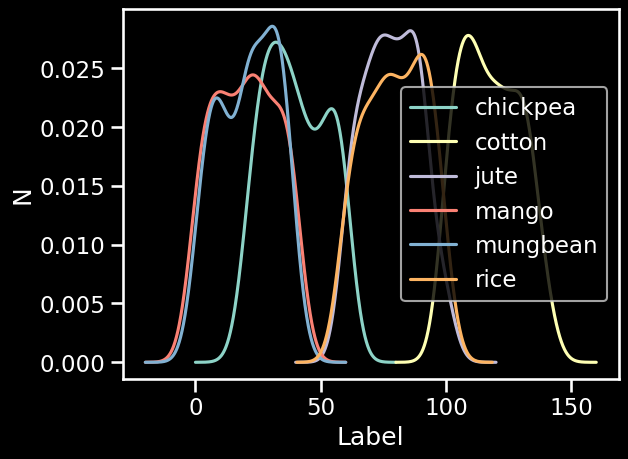

In [33]:
plot_distribution_by_label('N')

In [34]:
np.count_nonzero(crop_data_selective['N']<=0)
# 4 invalid values of Nitrogen in soil

4

In [35]:
crop_data_selective=crop_data_selective[~(crop_data_selective['N']<=0)]
crop_data_selective.shape

(596, 8)

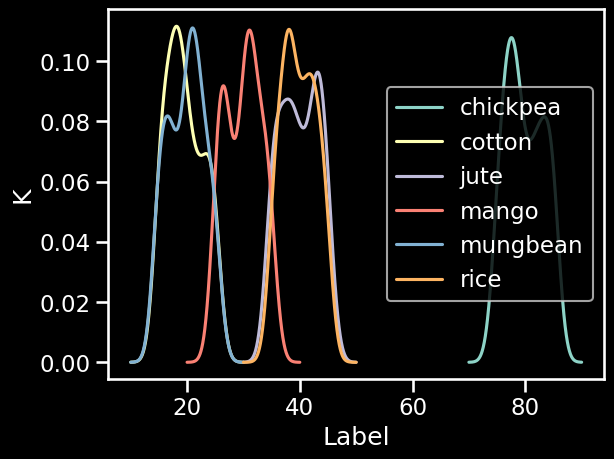

In [36]:
plot_distribution_by_label('K')

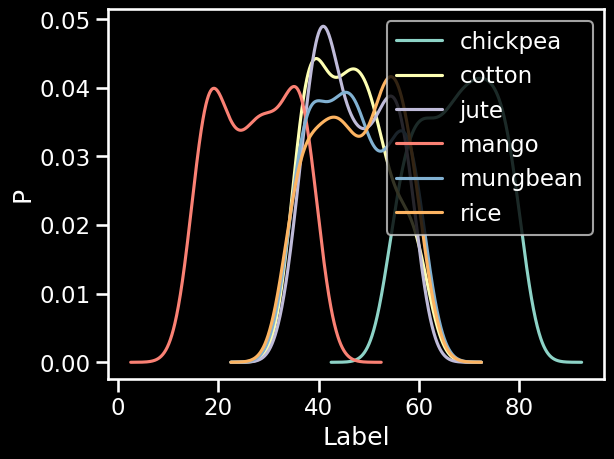

In [37]:
plot_distribution_by_label('P')

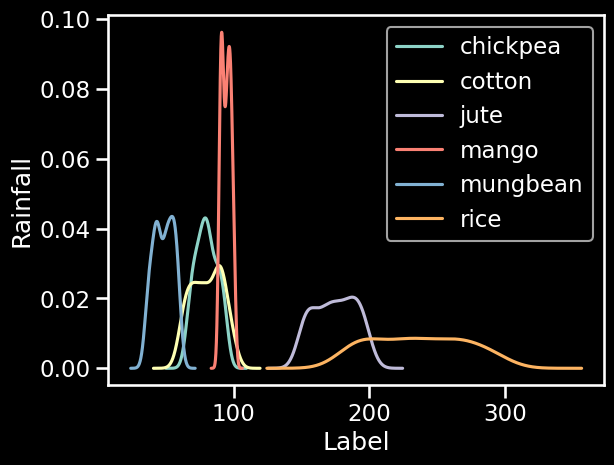

In [38]:
plot_distribution_by_label('rainfall')

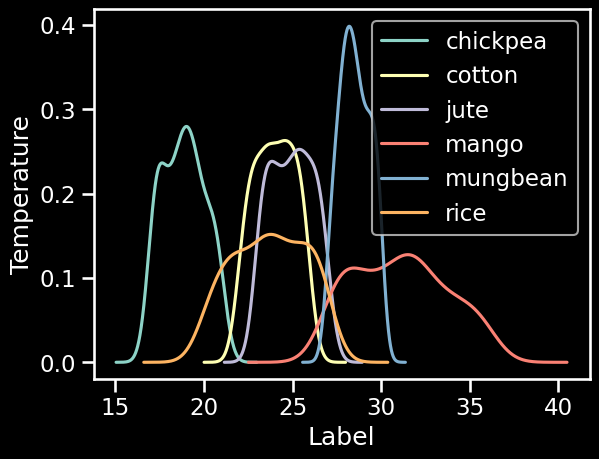

In [39]:
plot_distribution_by_label('temperature')

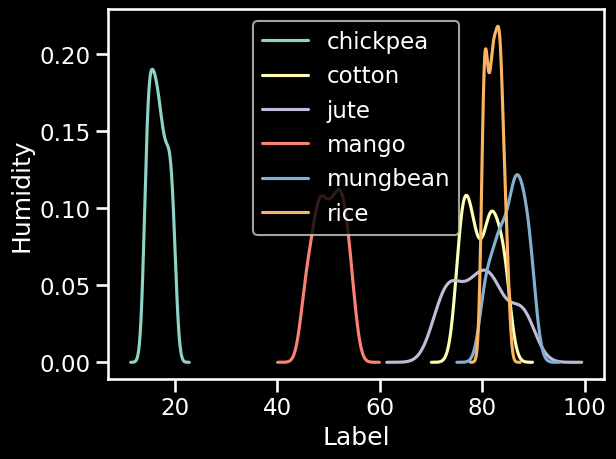

In [40]:
plot_distribution_by_label('humidity')

### Possible Outlier Detection for ph based on data from ICAR

- Mango : 5.5-7.5
- Rice : 5-8
- Chickpea : 6-8
- Cotton : 6.3-8.0
- Jute : 5-7.4
- Mungbean : 6.5-7.5

In [41]:
def count_outliers(feature,label,lower_limit,upper_limit):
    subset=crop_data_selective[crop_data_selective['label']==label]
    return np.count_nonzero((subset[feature]>=upper_limit) | (subset[feature]<=lower_limit))


In [42]:
count_outliers('ph','mango',5.5,7.5)

39

In [43]:
count_outliers('ph','rice',5,8)

0

In [44]:
count_outliers('ph','chickpea',6,8)

22

In [45]:
count_outliers('ph','cotton',6.3,8)

22

In [46]:
count_outliers('ph','jute',5,7.4)

5

In [47]:
count_outliers('ph','mungbean',6.5,7.5)

28

In [48]:
from sklearn.model_selection import train_test_split

X=crop_data_selective[numerical_cols]
y=crop_data_selective['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape

(476, 7)

## Preprocessing

1. Feature scaling to improve model resilience
2. Encoding of label
3. Outlier removal (not done in this project due to lack of subject matter expertise)

In [49]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled=pd.DataFrame(scaler.transform(X_test))

In [50]:
# One hot Encoding
y_train_encoded=pd.get_dummies(y_train)
y_test_encoded=pd.get_dummies(y_test)

In [51]:
train_data_cleaned=pd.concat([X_train_scaled.reset_index(drop=True),y_train.reset_index(drop=True)],axis=1)
train_data_cleaned.shape

(476, 8)

In [52]:
test_data_cleaned=pd.concat([X_test_scaled.reset_index(drop=True),y_test.reset_index(drop=True)],axis=1)
test_data_cleaned.shape

(120, 8)

In [ ]:
cwd=os.getcwd()

train_data_cleaned.to_csv('train_data_cleaned.csv')
test_data_cleaned.to_csv('test_data_cleaned.csv')

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import xgboost as xgb
import pickle

seed=41
logreg=LogisticRegression(random_state=seed,n_jobs=-1)
logreg.fit(X_train_scaled,y_train)
print("Accuracy:", logreg.score(X_test_scaled, y_test))

Accuracy: 0.9666666666666667


In [55]:
train_data_cleaned.head()

,0,1,2,3,4,5,6,label
0,-1.120565,-0.153273,-0.793374,1.098854,0.977450,0.287556,-0.968667,mungbean
1,-1.066240,-2.071356,-0.359797,1.383122,-0.705696,-0.893799,-0.442251,mango
2,-1.093403,-0.650554,-0.841549,1.139128,0.835692,-0.044858,-1.227466,mungbean
3,-1.609490,-0.579514,-1.130601,0.732168,0.694005,-0.243030,-1.048060,mungbean
4,-0.088392,1.622729,2.193494,-1.061315,-1.959558,-0.551281,-0.675887,chickpea


In [56]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [57]:
# outlier removal using IQR method

# cols = ['col_1', 'col_2'] # one or more

# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [58]:
gnb_clf=GaussianNB()
gnb_clf.fit(X_train_scaled,y_train)
print(accuracy_score(y_test,gnb_clf.predict(X_test_scaled)))

0.975


In [59]:
svm_clf=SVC(random_state=seed)
svm_clf.fit(X_train_scaled,y_train)
print(accuracy_score(y_test,svm_clf.predict(X_test_scaled)))

0.95


In [60]:
xgb_clf=xgb.XGBClassifier(tree_method='hist',enable_categorical=True)
xgb_clf.fit(X_train_scaled,y_train_encoded)
print(f'accuracy = {accuracy_score(y_test_encoded,xgb_clf.predict(X_test_scaled))}')

accuracy = 0.9833333333333333


In [61]:
rf_clf=RandomForestClassifier(random_state=seed,min_samples_split=100)
rf_clf.fit(X_train_scaled,y_train)
print(accuracy_score(y_test,rf_clf.predict(X_test_scaled)))

0.975


In [62]:
def print_metrics(classifier):
    print(f'Accuracy : {accuracy_score(y_test,classifier.predict(X_test_scaled))}\n')
    print(confusion_matrix(y_test,classifier.predict(X_test_scaled)))
    print(classification_report(y_test,classifier.predict(X_test_scaled)))

In [63]:
print_metrics(logreg)

Accuracy : 0.9666666666666667

[[19  0  0  0  0  0]
 [ 0 16  0  0  0  0]
 [ 0  0 20  0  0  1]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 25  0]
 [ 0  0  3  0  0 15]]
              precision    recall  f1-score   support

    chickpea       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        16
        jute       0.87      0.95      0.91        21
       mango       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        25
        rice       0.94      0.83      0.88        18

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [64]:
import os

filenames=['gnb','logreg','rf','xgb','svc']
cwd=os.getcwd()
os.mkdir(cwd+'\\inference_models')
os.chdir(cwd+'\\inference_models')
os.chdir(cwd)
models=[gnb_clf,logreg,rf_clf,svm_clf]
for idx,filename in enumerate(filenames):
    with open(filename+'.pkl', 'wb') as file:
        pickle.dump(models[idx],file)

IndexError: list index out of range

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test,logreg.predict(X_test_scaled),average='macro')
for model in models:
    print(f'F1 score for {model} is {f1_score(y_test, model.predict(X_test_scaled),average="macro")}')

F1 score for GaussianNB() is 1.0
F1 score for LogisticRegression(n_jobs=-1, random_state=41) is 0.9828042328042329
F1 score for RandomForestClassifier(min_samples_split=100, random_state=41) is 0.9828947368421054
F1 score for SVC(random_state=41) is 0.9826203208556151
